In [1]:
import snap

In [4]:
network_file='/Users/billyzhaoyh/Desktop/stanford-cs224w/hw0-bundle/wiki-Vote.txt'

In [6]:
wiki=snap.LoadEdgeList(snap.PNGraph, network_file, 0, 1)

1.1

In [10]:
counter_nodes=0
for NI in wiki.Nodes():
    counter_nodes+=1
print(counter_nodes)

7115


1.2

In [14]:
counter_nodes_self=0
for NI in wiki.Nodes():
    for Id in NI.GetOutEdges():
        if NI.GetId()==Id:
            counter_nodes_self+=1
print(counter_nodes_self)

0


1.3

There is no self edge so we just need to find out the total number of edges

In [19]:
counter_edges=0
for EI in wiki.Edges():
    if EI.GetSrcNId()==EI.GetDstNId():
        print('error')
    counter_edges+=1
print(counter_edges)

103689


1.4

In [20]:
#create a edge list and store the edge as a list of sorted tuples and find 

In [22]:
edge_list=[]
for EI in wiki.Edges():
    edge_tuple=sorted((EI.GetSrcNId(), EI.GetDstNId()))
    if edge_tuple not in edge_list:
        edge_list.append(edge_tuple)

In [23]:
print(len(edge_list))

100762


1.5

In [26]:
edge_list=[]
counter_reci_edge=0
for EI in wiki.Edges():
    edge_tuple=sorted((EI.GetSrcNId(), EI.GetDstNId()))
    if edge_tuple in edge_list:
        counter_reci_edge+=1
    else:
        edge_list.append(edge_tuple)

In [27]:
counter_reci_edge

2927

1.6,1.7,1.8 and 1.9

In [28]:
zero_out=0
zero_in=0
big_out=0
small_in=0
for NI in wiki.Nodes():
    if NI.GetOutDeg()==0:
        zero_out+=1
    elif NI.GetOutDeg()>10:
        big_out+=1
    if NI.GetInDeg()==0:
        zero_in+=1
    if NI.GetInDeg()<10:
        small_in+=1

In [29]:
zero_out

1005

In [30]:
zero_in

4734

In [31]:
big_out

1612

In [32]:
small_in

5165

In [87]:
snap.PrintInfo(wiki, "wiki Stats", "wiki-info.txt", False)

2.1

In [45]:
degree_dict={}
for NI in wiki.Nodes():
    if NI.GetOutDeg() in degree_dict:
        degree_dict[NI.GetOutDeg()]+=1
    else:
        degree_dict[NI.GetOutDeg()]=1

In [46]:
max_deg=max(degree_dict.keys())

In [47]:
degree_dict[max_deg]

1

In [51]:
x=[]
y=[]
for i in range(max_deg+1):
    if i in degree_dict:
        if degree_dict[i]!=0:
            x.append(i)
            y.append(degree_dict[i])

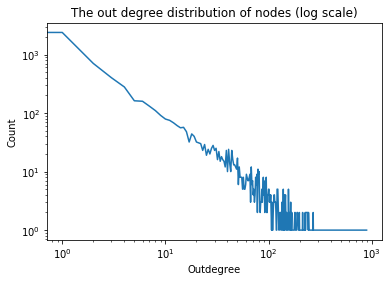

In [56]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.title('The out degree distribution of nodes (log scale)')
plt.xlabel('Outdegree')
plt.ylabel('Count')
plt.show()

2.2

In [58]:
import numpy as np

In [77]:
x_array = np.array(x)
y_array = np.array(y)

In [83]:
coef = np.polyfit(x_array, y_array, 1)

In [84]:
coef

array([-0.215841  , 63.25871614])

In [85]:
y_line=[ i*coef[0]+coef[1] for i in x]

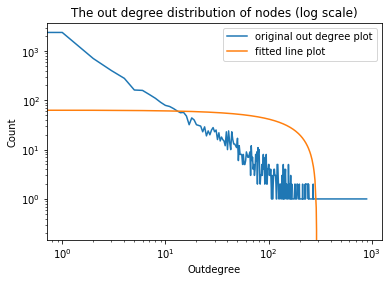

In [86]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,y,label='original out degree plot')
plt.plot(x,y_line,label='fitted line plot')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('The out degree distribution of nodes (log scale)')
plt.xlabel('Outdegree')
plt.ylabel('Count')
plt.show()

3

In [88]:
sof_java='/Users/billyzhaoyh/Desktop/stanford-cs224w/hw0-bundle/stackoverflow-Java.txt'

In [89]:
java=snap.LoadEdgeList(snap.PNGraph, sof_java, 0, 1)

In [93]:
snap.PrintInfo(java, "Stack Overflow Java Stats", "java-info.txt", False)

3.1

In [90]:
Components = snap.TCnComV()
snap.GetWccs(java, Components)

In [92]:
Components.Len()

10143

3.2

In [94]:
MxWcc = snap.GetMxWcc(java)

In [96]:
print ("max wcc nodes %d, edges %d" %
(MxWcc.GetNodes(), MxWcc.GetEdges()))

max wcc nodes 131188, edges 322486


3.3

In [97]:
PRankH = snap.TIntFltH()

In [98]:
snap.GetPageRank(java, PRankH)

In [101]:
prv={}
for key in PRankH:
    prv[key]=PRankH[key]

In [105]:
new_dict={k: v for k, v in sorted(prv.items(), key=lambda item: item[1],reverse=True)}

In [107]:
new_dict

{992484: 0.013980540412209575,
 135152: 0.010005538895741885,
 22656: 0.007103532693128619,
 139985: 0.005520505792973484,
 157882: 0.004597314065384568,
 57695: 0.0037368910916053704,
 571407: 0.003571845170779561,
 70604: 0.003502142916548724,
 218978: 0.0029181679358848893,
 103154: 0.0024593592204856314,
 573032: 0.002304785636277642,
 18122: 0.002225702267757072,
 1189885: 0.002190987610836401,
 230513: 0.002170106623095854,
 203907: 0.002110327622837872,
 418556: 0.0020961546455845127,
 501557: 0.002024957641307936,
 438154: 0.0019031675017809934,
 21234: 0.0018450954772979806,
 131872: 0.0017809932472143976,
 416206: 0.0017768773004152637,
 207421: 0.001749556797927865,
 383861: 0.0017458292847750921,
 522444: 0.0017193215502769022,
 137369: 0.0016983407172397906,
 4725: 0.001690582610692118,
 2126854: 0.0016778810421231572,
 829571: 0.0015913761778984536,
 869736: 0.0015890696962101857,
 217862: 0.001576675375091249,
 1103872: 0.0015563052069081935,
 42344: 0.001529054355865265

3.4

In [108]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()

In [109]:
snap.GetHits(java, NIdHubH, NIdAuthH)

In [110]:
hub={}
for key in NIdHubH:
    hub[key]=NIdHubH[key]

In [112]:
new_dict={k: v for k, v in sorted(hub.items(), key=lambda item: item[1],reverse=True)}

In [113]:
new_dict

{892029: 0.07336380373389548,
 1194415: 0.05955074418794487,
 359862: 0.05687564588068672,
 648138: 0.05559306276715878,
 470184: 0.05317942934583511,
 384706: 0.05211310122210576,
 802050: 0.05012197998887926,
 44330: 0.04878076886559815,
 130758: 0.04809890065854372,
 454049: 0.048082793734462816,
 225899: 0.04708441402009883,
 710818: 0.045560297926918625,
 576758: 0.0451934653715465,
 431769: 0.04493788905834426,
 1527084: 0.04442699140732837,
 85821: 0.043414295072072846,
 682662: 0.043052516375802534,
 187141: 0.04301642717968511,
 273657: 0.04285484440734913,
 364914: 0.042651132776328225,
 39677: 0.04224993236863407,
 1094640: 0.04201873946727426,
 72437: 0.041973905564658756,
 106261: 0.041564716198113714,
 520957: 0.04063598227211728,
 2017866: 0.04063181154776686,
 100516: 0.03997467356878016,
 1379286: 0.03892009259719853,
 159793: 0.03862961979358382,
 230717: 0.03816517155909425,
 496949: 0.03807012217494602,
 734984: 0.0376691316751264,
 643742: 0.036911545605664405,
 11

In [114]:
auth={}
for key in NIdAuthH:
    auth[key]=NIdAuthH[key]

In [115]:
new_dict={k: v for k, v in sorted(auth.items(), key=lambda item: item[1],reverse=True)}

In [116]:
new_dict

{22656: 0.6047239730413133,
 157882: 0.2986993488728824,
 571407: 0.2839071934144654,
 57695: 0.26930508258231756,
 139985: 0.24940086742800438,
 203907: 0.18351653975514165,
 522444: 0.10291723382161509,
 131872: 0.09985513345497855,
 230513: 0.09915494213458168,
 276052: 0.09824192148532879,
 21234: 0.09616691116060014,
 605744: 0.0943199721928649,
 207421: 0.08872077989123821,
 992484: 0.08774530314417738,
 103154: 0.08420083871634018,
 37213: 0.0825563718690158,
 260990: 0.08204472332340183,
 70604: 0.08043630535485523,
 829571: 0.08024769621685228,
 418556: 0.07663600357170769,
 40342: 0.07396109264717798,
 342852: 0.07069025121187121,
 438154: 0.07034388255857753,
 16883: 0.06511372817221779,
 12960: 0.06392267327463191,
 871026: 0.06226331823973252,
 256196: 0.062111813437695326,
 478399: 0.06121260626167343,
 714968: 0.05873695560384998,
 1103872: 0.05843473847859593,
 335858: 0.05767028412152757,
 367273: 0.05721756932098353,
 1679863: 0.05638976377877179,
 105224: 0.053706904